## Para calcular el área bajo la curva (datos de una hora):

In [1]:
import pandas as pd
import os
import numpy as np
from scipy.interpolate import interp1d
import math
import matplotlib.pyplot as plt
import pprint

In [2]:
os.getcwd()

'/datos/Practica_final_equipos'

### Generamos el DataFrame con los datos por segundo:

In [8]:
data_segundos = pd.read_csv("Verano_16.csv")
seg = np.linspace(0, 86400, 43201)
a_seg = np.array(seg)
data_seg = pd.DataFrame(seg, columns = ["Segundo"]) 
DEM = pd.DataFrame(data_segundos.Demanda, columns = ["Demanda"])
data_seg["Demanda"] = DEM["Demanda"]

In [9]:
data_seg

,Segundo,Demanda
0,0.0,8544.239258
1,2.0,8538.705078
2,4.0,8556.333008
3,6.0,8563.195312
4,8.0,8559.343750
...,...,...
43196,86392.0,8599.916992
43197,86394.0,8610.962891
43198,86396.0,8610.962891
43199,86398.0,8605.673828


In [14]:
#Dejando sólo los datos de una hora:
del_rows_1hr = range(1801,43201)
data_seg_1hr = data_seg.drop(data_seg.index[del_rows_1hr], axis = 0)
data_seg_1hr

,Segundo,Demanda
0,0.0,8544.239258
1,2.0,8538.705078
2,4.0,8556.333008
3,6.0,8563.195312
4,8.0,8559.343750
...,...,...
1796,3592.0,8044.067383
1797,3594.0,8044.067383
1798,3596.0,8048.309570
1799,3598.0,8051.222168


#### Calculando área bajo la curva usando trapz:

In [32]:
dem_trapz_1hr = np.trapz(data_seg_1hr.Demanda, data_seg_1hr.Segundo)
print(f"{dem_trapz_1hr:,.2f}")
dem_int = dem_trapz_1hr/3600
dem_int

30,009,637.63


8336.010452338325

#### Calculando área bajo la curva usando promedio de altura mínima y máxima:

In [34]:
dem_1hr = data_seg_1hr["Demanda"]
dem_max_1hr = dem_1hr.max()
dem_min_1hr = dem_1hr.min()
print("Max: ", f"{dem_max_1hr:,.2f}")
print("Min: ", f"{dem_min_1hr:,.2f}")
prom = (dem_max_1hr+dem_min_1hr)/2
print("El promedio es:", prom)

Max:  8,655.43
Min:  7,961.38
El promedio es: 8308.40576171875


In [18]:
dem_prom_1hr = ((dem_max_1hr+dem_min_1hr)/2)*3600
print(f"{dem_prom_1hr:,.2f}")

29,910,260.74


#### Diferencia en porcentajes de datos de 1 hora, usando trapz y considerando promedio de mínimo y máximo:

In [30]:
dif_1hr = dem_trapz_1hr - dem_prom_1hr
dif_pc_1hr = dif_1hr*100/dem_trapz_1hr
print("El cálculo cada 2 segundos arroja un área", f"{dif_pc_1hr:,.2f}", "% mayor, que considerando el promedio del mínimo y máximo de una hora.")

El cálculo cada 2 segundos arroja un área 0.33 % mayor, que considerando el promedio del mínimo y máximo de una hora.


### Graficando:

In [21]:
#Puntos para graficar:
x_values_1hr = [0,60]
y_max_1hr = [dem_max_1hr, dem_max_1hr]
y_min_1hr = [dem_min_1hr, dem_min_1hr]
y_prom_1hr = [(dem_max_1hr+dem_min_1hr)/2, (dem_max_1hr+dem_min_1hr)/2]

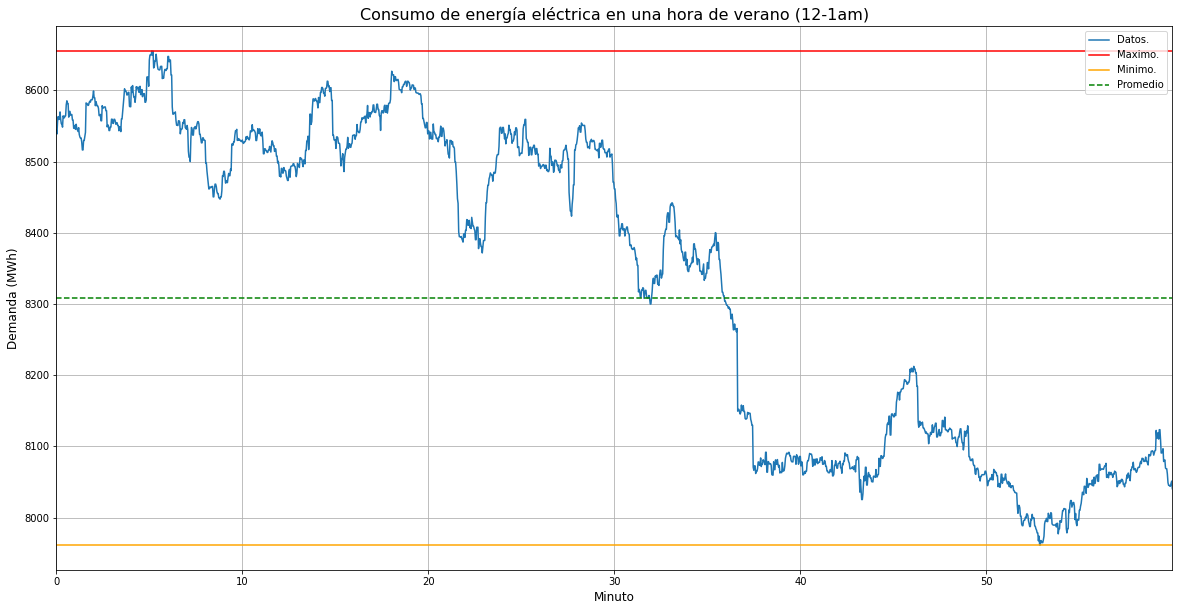

In [28]:
fig = plt.figure(figsize=(20,10))
plt.plot((data_seg_1hr.Segundo/60), data_seg_1hr.Demanda)
plt.title("Consumo de energía eléctrica en una hora de verano (12-1am)", fontsize = 16)
plt.xlim(0, 60)
plt.xticks(np.arange(0, 60, step=10))
plt.xlabel('Minuto', fontsize = 12)
plt.ylabel('Demanda (MWh)', fontsize= 12)
plt.plot(x_values_1hr,y_max_1hr, color = "red")
plt.plot(x_values_1hr,y_min_1hr, color = "orange")
plt.plot(x_values_1hr,y_prom_1hr, "g--")
plt.legend(['Datos.','Maximo.',"Minimo.","Promedio"], loc=1)
plt.grid(True)
plt.show()